# The ContentMine Toolkit

## Introduction

These notebooks aim to provide an introduction to some of the tools in the [ContentMine](http://contentmine.org/) toolkit.

<p style="text-align: center; background-color: lightyellow;">
    These <a href="https://jupyter.org/">Juypter Notebooks</a> provide an interactive environment where you can run Python scripts and shell commands and see the results in your browser.<br/>
    For shell commands, each line starts with a <tt>!</tt>, so <tt>!echo hello</tt> runs a shell script, but <tt>print('hello')</tt> runs as Python.<br/>
    For a more detailed introduction, try this <a href="https://programminghistorian.org/en/lessons/jupyter-notebooks">Introduction to Jupyter Notebooks</a>.
</p>
            
### The Big Picture

The vison that drives ContentMine is that text and data mining should be used to open up all research literature, allowing the factual content to be made available to all, and helping researchers to make better use of what has already been discovered.

### Overall Approach

The high-level workflow for meeting this vision works as follows.

Given a research question or area of interest:

- Collect all relevant publications:
    - This may be as PDF files or as XML or HTML.
- Normalise the publications into a better machine-readable form:
    - Ideally, well-structured HTML (referred to here as 'scholarly HTML', but ntoe that this does _not_ refer to [the proposed Scholarly HTML standard](https://w3c.github.io/scholarly-html/)). _TBA what does the "HTML subset in [JATS](https://jats.nlm.nih.gov/)" mean?_
    - If HTML isn't an option, plain text can be used.
    - However, depending on the question at hand, other formats might be required.
- Extract facts:
    - Which papers mention which terms and concepts?
    - What research cited in each paper?
    - Which chemical compounds appear in the diagrams of each paper.
- Share the results:
    - Make the normalised publications available (if licensing permits).
    - Make the extracted facts openly available (factual assertions and [non-consumptive datasets](https://www.hathitrust.org/htrc_ncup) can usually be made available without restriction).
    - Create visualisations and documentation to help understand the results.
- Make new knowledge:
    - Use the results as the foundation for your own research.

Here, however, we'll focus on a specific use case and use that to explore how the approach works.

## The openVirus Project

In response to the COVID-19 epidemic, the [openVirus project](https://github.com/petermr/openVirus#openvirus) aims to aggregate scholarly publications and extracted knowledge on viruses and epidemics.

Here, we'll look at the specific case of finding which open access electronic theses mention terms relating to viruses and epidemics. Information about UK e-theses has been gathered by the [EThOS service](https://ethos.bl.uk/), and a suitable source dataset has been made available [here](https://data.bl.uk/ethos/).

The specific workflow here is:

- Use the EThOS dataset to find open-access theses.
- Get the PDFs and assemble them into the file folder layout conventions of the ContentMine toolkit.
- Generate HTML or text versions of the PDFs.
- Search through the HTML for the relevant terms, and extract the terms along with snippets of text as context for each time the terms appear.

The openVirus project has already created some [dictionaries](https://github.com/petermr/openVirus/tree/master/dictionaries) that can be used to link the terms that appear in the text to the relevant WikiData entities. _TBA come back to dictionary creation later on_

But to get started, we need some data sources. We'll start with a single theses, found by searching EThOS for relevant terms: [TraVerse : a method of natural respiratory virus transmission from symptomatic children to healthy young adults](https://ethos.bl.uk/OrderDetails.do?uin=uk.bl.ethos.755301) (`id: uk.bl.ethos.755301`)

This command was used to create the initial folder structure:

    ami-makeproject -p ethos --rawfiletypes pdf

Resulting in a folder called `ethos` containing a JSON project file:

```
ethos/make_project.json
```

We then add the full text, as per the expected folder layout (called the [CProject](https://github.com/ContentMine/workshop-resources/blob/master/software-tutorials/cproject/README.md) naming conventions). Listing all files shows:

```
ethos/make_project.json
ethos/uk.bl.ethos.755301/
ethos/uk.bl.ethos.755301/fulltext.pdf
```

The PDF looks like this:

In [11]:
from IPython.display import IFrame,display

display(IFrame(src="ethos/uk.bl.ethos.755301/fulltext.pdf", width="60%", height="300px"))

However, to perform the dictionary analysis we need either a plain text version in a file called:

```
ethos/uk.bl.ethos.755301/fulltext.pdf.txt
```

Or a HTML version in a file called:

```
ethos/uk.bl.ethos.755301/scholarly.html
```

The ContentMine toolkit provide wrappers for some sophisticated tools for performing PDF-to-HTML conversion, but for our purposes we can start with a simple HTML version generated by [Apache Tika](https://tika.apache.org/).

The following sequence of shell command can be used to generate a suitable HTML version:

In [2]:
!echo "Converting to HTML using Apache Tika..."
!java -jar /opt/tika.jar ethos/uk.bl.ethos.755301/fulltext.pdf > ethos/uk.bl.ethos.755301/scholarly.html
!echo "DONE!"
!ls -l ethos/uk.bl.ethos.755301/scholarly.html

Converting to HTML using Apache Tika...
Mar 30, 2020 7:58:16 AM org.apache.tika.config.InitializableProblemHandler$3 handleInitializableProblem
See https://pdfbox.apache.org/2.0/dependencies.html#jai-image-io
for optional dependencies.

Mar 30, 2020 7:58:16 AM org.apache.tika.config.InitializableProblemHandler$3 handleInitializableProblem
you've excluded the TesseractOCRParser from the default parser.
Tesseract may dramatically slow down content extraction (TIKA-2359).
As of Tika 1.15 (and prior versions), Tesseract is automatically called.
In future versions of Tika, users may need to turn the TesseractOCRParser on via TikaConfig.
Mar 30, 2020 7:58:16 AM org.apache.tika.config.InitializableProblemHandler$3 handleInitializableProblem
Please provide the jar on your classpath to parse sqlite files.
See tika-parsers/pom.xml for the correct version.
WARN  Using fallback font 'LiberationSans' for 'Arial-BoldMT'
WARN  Using fallback font 'LiberationSans' for 'Arial-BoldItalicMT'
WARN  Using 

The resulting HTML is very simple, and looks like this:

In [10]:
display(IFrame(src="ethos/uk.bl.ethos.755301/scholarly.html", width="60%", height="300px"))

Now we have HTML, we can finally extract some facts! We use the `ami-search` tool from the ContentMine [AMI3](https://github.com/petermr/ami3) project, which takes dictionaries of keywords relating to specific concepts and records where they appear in a set of texts.

The arguments specify:

- `-p ethos` to specify which project to process,
- `--forcemake` to make sure the output is regenerated even if the output files already exist,
- followed by a list of dictionaries to use, in this case `virus_topics` and `virus_systemic_diseases`.


In [18]:
!ami-search -p ethos --forcemake --dictionary=virus_topics --dictionary=viral_systemic_diseases


Generic values (AMISearchTool)
-v to see generic values
oldstyle            true

Specific values (AMISearchTool)
oldstyle             true
strip numbers        false
wordCountRange       (20,1000000)
wordLengthRange      (1,20)

dictionaryList       [virus_topics, viral_systemic_diseases]
dictionaryTop        null
dictionarySuffix     [xml]

0    [main] DEBUG org.contentmine.ami.tools.AbstractAMISearchTool  - old style search command); change
0 [main] DEBUG org.contentmine.ami.tools.AbstractAMISearchTool  - old style search command); change
cProject: ethos
legacy cmd> word(frequencies)xpath:@count>20~w.stopwords:pmcstop.txt_stopwords.txt
legacy cmd> search(virus_topics)
legacy cmd> search(viral_systemic_diseases)

large document (7031) for uk.bl.ethos.755301 truncated to 500 sections
...
large document (7031) for uk.bl.ethos.755301 truncated to 500 sections
...
large document (7031) for uk.bl.ethos.755301 truncated to 500 sections
...
create data tables
rrrr

uk.bl.ethos.755301 

If we look in the `ethos` folder we can see all the new files created by the `ami-search` process:

In [4]:
find ethos -type f

ethos/uk.bl.ethos.755301/word.frequencies.count.xml
ethos/uk.bl.ethos.755301/scholarly.pdf
ethos/uk.bl.ethos.755301/search.country.count.xml
ethos/uk.bl.ethos.755301/scholarly.html
ethos/uk.bl.ethos.755301/results/word/frequencies/results.html
ethos/uk.bl.ethos.755301/results/word/frequencies/results.xml
ethos/uk.bl.ethos.755301/results/search/country/results.xml
ethos/uk.bl.ethos.755301/word.frequencies.snippets.xml
ethos/uk.bl.ethos.755301/fulltext.pdf
ethos/uk.bl.ethos.755301/search.country.snippets.xml
ethos/word.frequencies.count.xml
ethos/word.frequencies.documents.xml
ethos/search.country.documents.xml
ethos/full.dataTables.html
ethos/search.country.count.xml
ethos/word.frequencies.snippets.xml
ethos/search.country.snippets.xml
ethos/__cooccurrence/country/histogram.svg
ethos/__cooccurrence/country/histogram.csv
ethos/__cooccurrence/country-country/cooccur.svg
ethos/__cooccurrence/country-country/cooccur.csv
ethos/__cooccurrence/allPlots.svg
ethos/commonest.dataTables.html
ethos

_TBA look at the results..._ 

In [13]:
display(IFrame(src="ethos/uk.bl.ethos.755301/results/search/virus_topics/results.xml", width="100%", height="300px"))

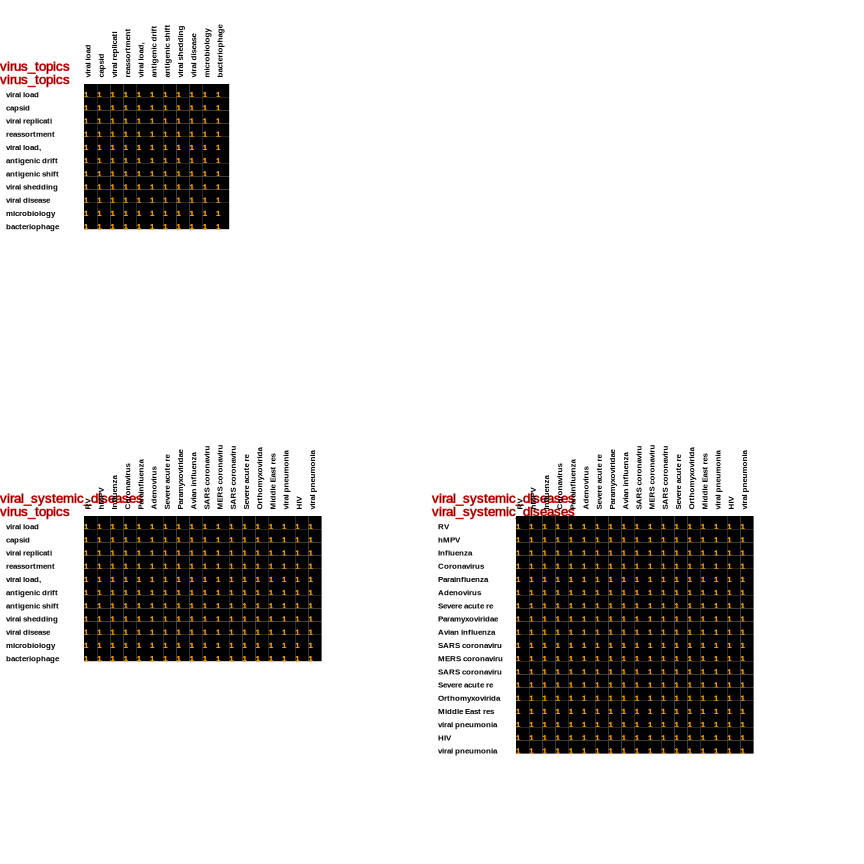

In [14]:
from IPython.display import SVG,display
display(SVG(filename='ethos/__cooccurrence/allPlots.svg'))